Effect size: 0.5078885120696841
Sample size/Number needed in each group: 61.831
Power: 0.977
Confidence interval for Transition from saccade to fixaton for ASD participant: [5.293, 5.443]
Confidence interval for Transition from saccade to fixation for TD participant: [5.303, 5.433]


/Users/maryamlotfigolian/opt/anaconda3/envs/Thesis/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/Users/maryamlotfigolian/opt/anaconda3/envs/Thesis/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


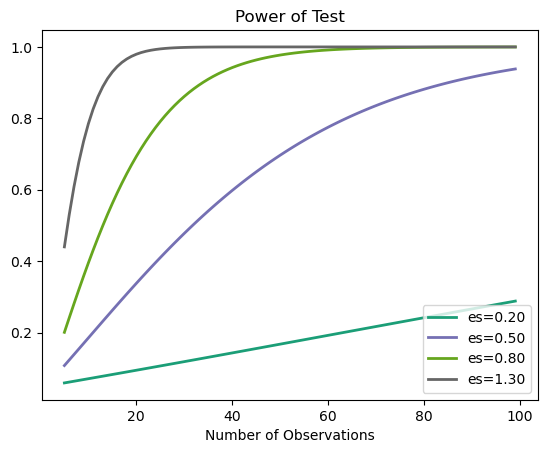

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.power import TTestPower
from scipy.stats import t


# Load the hidden Markov parameters for both groups
asd_data = pd.read_excel('ASD parameters.xlsx')
td_data = pd.read_excel('TD parameters.xlsx')
# Convert all values to numeric type, replace non-numeric values with NaN
#asd_data = asd_data.apply(pd.to_numeric, errors='coerce')
#td_data = td_data.apply(pd.to_numeric, errors='coerce')

asd_s2f= asd_data['Transition rate from saccade to fixation']
td_s2f=td_data['Transition rate from saccade to fixation']


#calculation of effect size
# size of samples in each groups
n1, n2 = 167, 226
  
# Calculate the mean and standard deviation of each group
asd_mean = asd_s2f.mean()
asd_std = asd_s2f.std()
td_mean = td_s2f.mean()
td_std = td_s2f.std()
  
# calculate the pooled standard deviation 
# (Cohen's d)
s = sqrt(((n1 - 1) * asd_std **2+ (n2 - 1) * td_std**2) / (n1 + n2 - 2))


# calculate the effect size
d = (asd_mean - td_mean) / s
print(f'Effect size: {d}')

# Set the significance level and power
alpha = 0.05
power = 0.8

# perform power analysis to find sample size 
# for given effect
obj = TTestIndPower()
n = obj.solve_power(effect_size=d, alpha=alpha, power=power, 
                    ratio=1, alternative='two-sided')


print('Sample size/Number needed in each group: {:.3f}'.format(n))



power = TTestPower()
n_test = power.solve_power(nobs=62, effect_size = 0.51,
                           power = None, alpha = 0.05)
print('Power: {:.3f}'.format(n_test))




# Calculate the confidence interval for ASD 
dof = n1-1
confidence = 0.95
t_value = np.abs(t.ppf((1-confidence)/2,dof))
#t_value = 1.96 # for a 95% confidence level and df=165
se_mean = asd_std / sqrt(n1)
margin_error = t_value * se_mean
lower_bound = asd_mean - margin_error
upper_bound = asd_mean + margin_error
print(f'Confidence interval for Transition from saccade to fixaton for ASD participant: [{lower_bound:.3f}, {upper_bound:.3f}]')

# Calculate the confidence interval for TD
dof = n2-1
confidence = 0.95
t_value = np.abs(t.ppf((1-confidence)/2,dof))
#t_value = 1.96 # for a 95% confidence level and df=165
se_mean = asd_std / sqrt(n2)
margin_error = t_value * se_mean
lower_bound = asd_mean - margin_error
upper_bound = asd_mean + margin_error
print(f'Confidence interval for Transition from saccade to fixation for TD participant: [{lower_bound:.3f}, {upper_bound:.3f}]')


# power analysis varying parameters
effect_sizes = np.array([0.2, 0.5, 0.8,1.3])
sample_sizes = np.array(range(5, 100))
  
# plot power curves
obj = TTestIndPower()
obj.plot_power(dep_var='nobs', nobs=sample_sizes,
               effect_size=effect_sizes)
  
plt.show()



Effect size: 0.6612555499244384
Sample size/Number needed in each group: 36.886
Power: 0.974
Confidence interval for Transition from fixation to saccade for ASD participant: [6.787, 6.926]
Confidence interval for Transition from fixation to saccade for TD participant: [6.797, 6.916]


/Users/maryamlotfigolian/opt/anaconda3/envs/Thesis/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/Users/maryamlotfigolian/opt/anaconda3/envs/Thesis/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


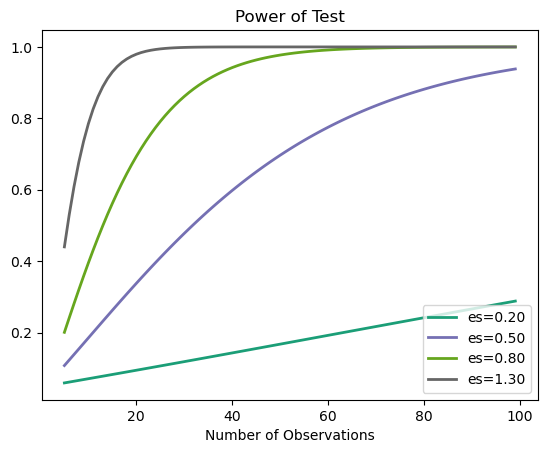

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.power import TTestPower

# Load the hidden Markov parameters for both groups
asd_data = pd.read_excel('ASD parameters.xlsx')
td_data = pd.read_excel('TD parameters.xlsx')
# Convert all values to numeric type, replace non-numeric values with NaN
#asd_data = asd_data.apply(pd.to_numeric, errors='coerce')
#td_data = td_data.apply(pd.to_numeric, errors='coerce')

asd= asd_data['Transition rate from fixation to saccade']
td=td_data['Transition rate from fixation to saccade']

#calculation of effect size
# size of samples in each groups
n1, n2 = 167, 226
  
# Calculate the mean and standard deviation of each group
asd_mean = asd.mean()
asd_std = asd.std()
td_mean = td.mean()
td_std = td.std()
  
# calculate the pooled standard deviation 
# (Cohen's d)
s = sqrt(((n1 - 1) * asd_std **2+ (n2 - 1) * td_std**2) / (n1 + n2 - 2))


# calculate the effect size
d = (td_mean-asd_mean) / s
print(f'Effect size: {d}')

# Set the significance level and power
alpha = 0.05
power = 0.8

# perform power analysis to find sample size 
# for given effect
obj = TTestIndPower()
n = obj.solve_power(effect_size=d, alpha=alpha, power=power, 
                    ratio=1, alternative='two-sided')


print('Sample size/Number needed in each group: {:.3f}'.format(n))

power = TTestPower()
n_test = power.solve_power(nobs=37, effect_size = 0.66,
                           power = None, alpha = 0.05)
print('Power: {:.3f}'.format(n_test))

# Calculate the confidence interval for ASD 
dof = n1-1
confidence = 0.95
t_value = np.abs(t.ppf((1-confidence)/2,dof))
#t_value = 1.96 # for a 95% confidence level and df=165
se_mean = asd_std / sqrt(n1)
margin_error = t_value * se_mean
lower_bound = asd_mean - margin_error
upper_bound = asd_mean + margin_error
print(f'Confidence interval for Transition from fixation to saccade for ASD participant: [{lower_bound:.3f}, {upper_bound:.3f}]')

# Calculate the confidence interval for TD
dof = n2-1
confidence = 0.95
t_value = np.abs(t.ppf((1-confidence)/2,dof))
#t_value = 1.96 # for a 95% confidence level and df=165
se_mean = asd_std / sqrt(n2)
margin_error = t_value * se_mean
lower_bound = asd_mean - margin_error
upper_bound = asd_mean + margin_error
print(f'Confidence interval for Transition from fixation to saccade for TD participant: [{lower_bound:.3f}, {upper_bound:.3f}]')

# power analysis varying parameters
effect_sizes = np.array([0.2, 0.5, 0.8,1.3])
sample_sizes = np.array(range(5, 100))
  
# plot power curves
obj = TTestIndPower()
obj.plot_power(dep_var='nobs', nobs=sample_sizes,
               effect_size=effect_sizes)
  
plt.show()





Effect size: 0.7079626205820948
Sample size/Number needed in each group: 32.309
Power: 0.977
Confidence interval for Fixation velocities mean for ASD participant: [6.054, 6.215]
Confidence interval for Fixation velocities mean for TD participant: [6.065, 6.204]


/Users/maryamlotfigolian/opt/anaconda3/envs/Thesis/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/Users/maryamlotfigolian/opt/anaconda3/envs/Thesis/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


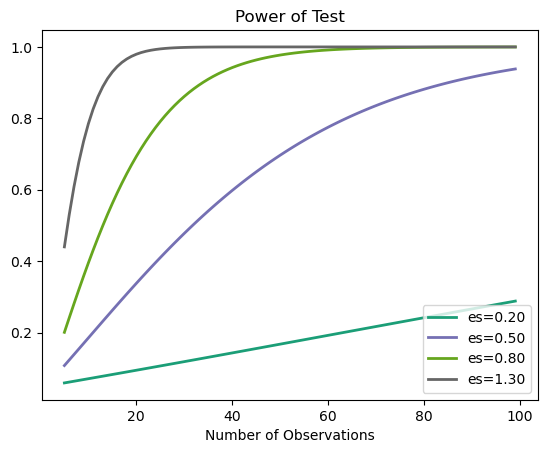

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.power import TTestPower

# Load the hidden Markov parameters for both groups
asd_data = pd.read_excel('ASD parameters.xlsx')
td_data = pd.read_excel('TD parameters.xlsx')
# Convert all values to numeric type, replace non-numeric values with NaN
#asd_data = asd_data.apply(pd.to_numeric, errors='coerce')
#td_data = td_data.apply(pd.to_numeric, errors='coerce')

asd= asd_data['Fixation velocities mean']
td=td_data['Fixation velocities mean']

#calculation of effect size
# size of samples in each groups
n1, n2 = 167, 226
  
# Calculate the mean and standard deviation of each group
asd_mean = asd.mean()
asd_std = asd.std()
td_mean = td.mean()
td_std = td.std()
  
# calculate the pooled standard deviation 
# (Cohen's d)
s = sqrt(((n1 - 1) * asd_std **2+ (n2 - 1) * td_std**2) / (n1 + n2 - 2))


# calculate the effect size
d = (asd_mean - td_mean) / s
print(f'Effect size: {d}')

# Set the significance level and power
alpha = 0.05
power = 0.8

# perform power analysis to find sample size 
# for given effect
obj = TTestIndPower()
n = obj.solve_power(effect_size=d, alpha=alpha, power=power, 
                    ratio=1, alternative='two-sided')


print('Sample size/Number needed in each group: {:.3f}'.format(n))

power = TTestPower()
n_test = power.solve_power(nobs=33, effect_size = 0.71,
                           power = None, alpha = 0.05)
print('Power: {:.3f}'.format(n_test))

# Calculate the confidence interval for ASD 
dof = n1-1
confidence = 0.95
t_value = np.abs(t.ppf((1-confidence)/2,dof))
#t_value = 1.96 # for a 95% confidence level and df=165
se_mean = asd_std / sqrt(n1)
margin_error = t_value * se_mean
lower_bound = asd_mean - margin_error
upper_bound = asd_mean + margin_error
print(f'Confidence interval for Fixation velocities mean for ASD participant: [{lower_bound:.3f}, {upper_bound:.3f}]')

# Calculate the confidence interval for TD
dof = n2-1
confidence = 0.95
t_value = np.abs(t.ppf((1-confidence)/2,dof))
#t_value = 1.96 # for a 95% confidence level and df=165
se_mean = asd_std / sqrt(n2)
margin_error = t_value * se_mean
lower_bound = asd_mean - margin_error
upper_bound = asd_mean + margin_error
print(f'Confidence interval for Fixation velocities mean for TD participant: [{lower_bound:.3f}, {upper_bound:.3f}]')

# power analysis varying parameters
effect_sizes = np.array([0.2, 0.5, 0.8,1.3])
sample_sizes = np.array(range(5, 100))
  
# plot power curves
obj = TTestIndPower()
obj.plot_power(dep_var='nobs', nobs=sample_sizes,
               effect_size=effect_sizes)
  
plt.show()

Effect size: 0.4762261385314487
Sample size/Number needed in each group: 70.190
Power: 0.979
Confidence interval for Fixation velocities standard deviation for ASD participant: [1.266, 1.385]
Confidence interval for Fixation velocities standard deviation for TD participant: [1.275, 1.376]


/Users/maryamlotfigolian/opt/anaconda3/envs/Thesis/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/Users/maryamlotfigolian/opt/anaconda3/envs/Thesis/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


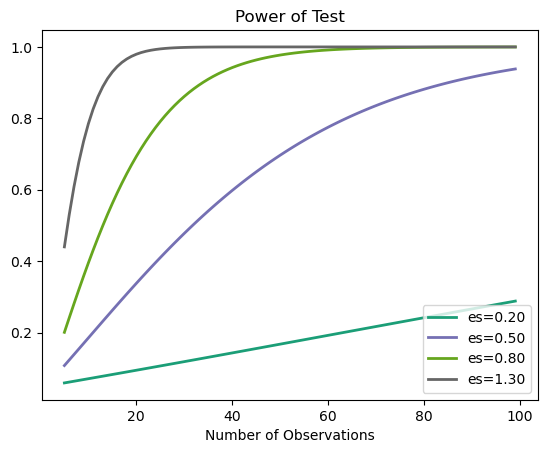

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.power import TTestPower

# Load the hidden Markov parameters for both groups
asd_data = pd.read_excel('ASD parameters.xlsx')
td_data = pd.read_excel('TD parameters.xlsx')
# Convert all values to numeric type, replace non-numeric values with NaN
#asd_data = asd_data.apply(pd.to_numeric, errors='coerce')
#td_data = td_data.apply(pd.to_numeric, errors='coerce')

asd= asd_data['Fixation velocities standard deviation']
td=td_data['Fixation velocities standard deviation']

#calculation of effect size
# size of samples in each groups
n1, n2 = 167, 226
  
# Calculate the mean and standard deviation of each group
asd_mean = asd.mean()
asd_std = asd.std()
td_mean = td.mean()
td_std = td.std()
  
# calculate the pooled standard deviation 
# (Cohen's d)
s = sqrt(((n1 - 1) * asd_std **2+ (n2 - 1) * td_std**2) / (n1 + n2 - 2))


# calculate the effect size
d = (asd_mean - td_mean) / s
print(f'Effect size: {d}')

# Set the significance level and power
alpha = 0.05
power = 0.8

# perform power analysis to find sample size 
# for given effect
obj = TTestIndPower()
n = obj.solve_power(effect_size=d, alpha=alpha, power=power, 
                    ratio=1, alternative='two-sided')


print('Sample size/Number needed in each group: {:.3f}'.format(n))

power = TTestPower()
n_test = power.solve_power(nobs=71, effect_size = 0.48,
                           power = None, alpha = 0.05)
print('Power: {:.3f}'.format(n_test))


# Calculate the confidence interval for ASD 
dof = n1-1
confidence = 0.95
t_value = np.abs(t.ppf((1-confidence)/2,dof))
#t_value = 1.96 # for a 95% confidence level and df=165
se_mean = asd_std / sqrt(n1)
margin_error = t_value * se_mean
lower_bound = asd_mean - margin_error
upper_bound = asd_mean + margin_error
print(f'Confidence interval for Fixation velocities standard deviation for ASD participant: [{lower_bound:.3f}, {upper_bound:.3f}]')

# Calculate the confidence interval for TD
dof = n2-1
confidence = 0.95
t_value = np.abs(t.ppf((1-confidence)/2,dof))
#t_value = 1.96 # for a 95% confidence level and df=165
se_mean = asd_std / sqrt(n2)
margin_error = t_value * se_mean
lower_bound = asd_mean - margin_error
upper_bound = asd_mean + margin_error
print(f'Confidence interval for Fixation velocities standard deviation for TD participant: [{lower_bound:.3f}, {upper_bound:.3f}]')

# power analysis varying parameters
effect_sizes = np.array([0.2, 0.5, 0.8,1.3])
sample_sizes = np.array(range(5, 100))
  
# plot power curves
obj = TTestIndPower()
obj.plot_power(dep_var='nobs', nobs=sample_sizes,
               effect_size=effect_sizes)
  
plt.show()

Effect size: 0.1449289521201346
Sample size/Number needed in each group: 748.315
Power: 0.436
Confidence interval for Saccade velocities mean for ASD participant: [8.500, 8.583]
Confidence interval for Saccade velocities mean for TD participant: [8.506, 8.577]


/Users/maryamlotfigolian/opt/anaconda3/envs/Thesis/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/Users/maryamlotfigolian/opt/anaconda3/envs/Thesis/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


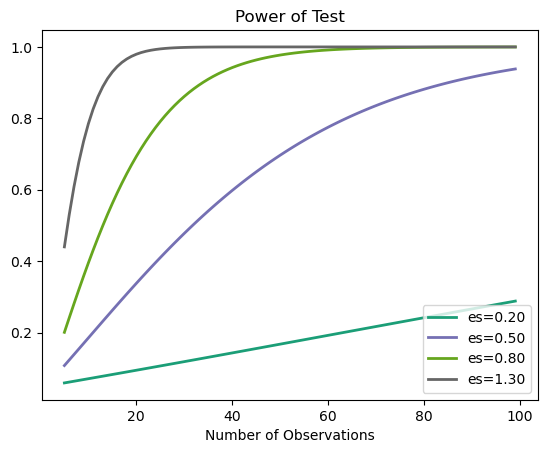

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.power import TTestPower

# Load the hidden Markov parameters for both groups
asd_data = pd.read_excel('ASD parameters.xlsx')
td_data = pd.read_excel('TD parameters.xlsx')
# Convert all values to numeric type, replace non-numeric values with NaN
#asd_data = asd_data.apply(pd.to_numeric, errors='coerce')
#td_data = td_data.apply(pd.to_numeric, errors='coerce')

asd= asd_data['Saccade velocities mean']
td=td_data['Saccade velocities mean']

#calculation of effect size
# size of samples in each groups
n1, n2 = 167, 226
  
# Calculate the mean and standard deviation of each group
asd_mean = asd.mean()
asd_std = asd.std()
td_mean = td.mean()
td_std = td.std()
  
# calculate the pooled standard deviation 
# (Cohen's d)
s = sqrt(((n1 - 1) * asd_std **2+ (n2 - 1) * td_std**2) / (n1 + n2 - 2))


# calculate the effect size
d = (asd_mean - td_mean) / s
print(f'Effect size: {d}')

# Set the significance level and power
alpha = 0.05
power = 0.8

# perform power analysis to find sample size 
# for given effect
obj = TTestIndPower()
n = obj.solve_power(effect_size=d, alpha=alpha, power=power, 
                    ratio=1, alternative='two-sided')


print('Sample size/Number needed in each group: {:.3f}'.format(n))

power = TTestPower()
n_test = power.solve_power(nobs=167, effect_size = 0.14,
                           power = None, alpha = 0.05)
print('Power: {:.3f}'.format(n_test))


# Calculate the confidence interval for ASD 
dof = n1-1
confidence = 0.95
t_value = np.abs(t.ppf((1-confidence)/2,dof))
#t_value = 1.96 # for a 95% confidence level and df=165
se_mean = asd_std / sqrt(n1)
margin_error = t_value * se_mean
lower_bound = asd_mean - margin_error
upper_bound = asd_mean + margin_error
print(f'Confidence interval for Saccade velocities mean for ASD participant: [{lower_bound:.3f}, {upper_bound:.3f}]')

# Calculate the confidence interval for TD
dof = n2-1
confidence = 0.95
t_value = np.abs(t.ppf((1-confidence)/2,dof))
#t_value = 1.96 # for a 95% confidence level and df=165
se_mean = asd_std / sqrt(n2)
margin_error = t_value * se_mean
lower_bound = asd_mean - margin_error
upper_bound = asd_mean + margin_error
print(f'Confidence interval for Saccade velocities mean for TD participant: [{lower_bound:.3f}, {upper_bound:.3f}]')

# power analysis varying parameters
effect_sizes = np.array([0.2, 0.5, 0.8,1.3])
sample_sizes = np.array(range(5, 100))
  
# plot power curves
obj = TTestIndPower()
obj.plot_power(dep_var='nobs', nobs=sample_sizes,
               effect_size=effect_sizes)
  
plt.show()

Effect size: -0.20781272890996685
Sample size/Number needed in each group: 364.453
Power: 0.729
Confidence interval for Saccade velocities standard deviation for ASD participant: [1.326, 1.416]
Confidence interval for Saccade velocities standard deviation for TD participant: [1.333, 1.410]


/Users/maryamlotfigolian/opt/anaconda3/envs/Thesis/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/Users/maryamlotfigolian/opt/anaconda3/envs/Thesis/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


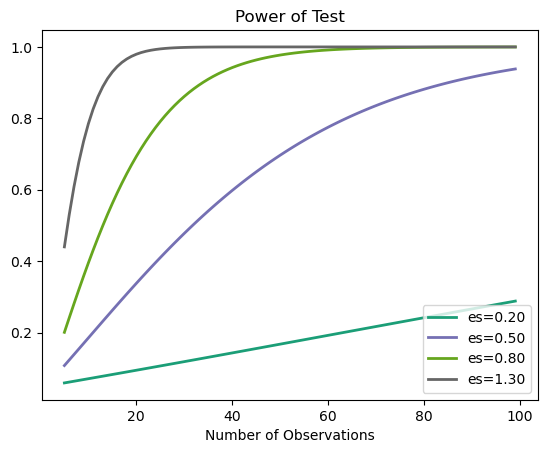

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.power import TTestPower

# Load the hidden Markov parameters for both groups
asd_data = pd.read_excel('ASD parameters.xlsx')
td_data = pd.read_excel('TD parameters.xlsx')
# Convert all values to numeric type, replace non-numeric values with NaN
#asd_data = asd_data.apply(pd.to_numeric, errors='coerce')
#td_data = td_data.apply(pd.to_numeric, errors='coerce')

asd= asd_data['Saccade velocities standard deviation']
td=td_data['Saccade velocities standard deviation']

#calculation of effect size
# size of samples in each groups
n1, n2 = 167, 226
  
# Calculate the mean and standard deviation of each group
asd_mean = asd.mean()
asd_std = asd.std()
td_mean = td.mean()
td_std = td.std()
  
# calculate the pooled standard deviation 
# (Cohen's d)
s = sqrt(((n1 - 1) * asd_std **2+ (n2 - 1) * td_std**2) / (n1 + n2 - 2))


# calculate the effect size
d = (asd_mean - td_mean) / s
print(f'Effect size: {d}')

# Set the significance level and power
alpha = 0.05
power = 0.8

# perform power analysis to find sample size 
# for given effect
obj = TTestIndPower()
n = obj.solve_power(effect_size=d, alpha=alpha, power=power, 
                    ratio=1, alternative='two-sided')


print('Sample size/Number needed in each group: {:.3f}'.format(n))

power = TTestPower()
n_test = power.solve_power(nobs=167, effect_size = 0.2,
                           power = None, alpha = 0.05)
print('Power: {:.3f}'.format(n_test))

# Calculate the confidence interval for ASD 
dof = n1-1
confidence = 0.95
t_value = np.abs(t.ppf((1-confidence)/2,dof))
#t_value = 1.96 # for a 95% confidence level and df=165
se_mean = asd_std / sqrt(n1)
margin_error = t_value * se_mean
lower_bound = asd_mean - margin_error
upper_bound = asd_mean + margin_error
print(f'Confidence interval for Saccade velocities standard deviation for ASD participant: [{lower_bound:.3f}, {upper_bound:.3f}]')

# Calculate the confidence interval for TD
dof = n2-1
confidence = 0.95
t_value = np.abs(t.ppf((1-confidence)/2,dof))
#t_value = 1.96 # for a 95% confidence level and df=165
se_mean = asd_std / sqrt(n2)
margin_error = t_value * se_mean
lower_bound = asd_mean - margin_error
upper_bound = asd_mean + margin_error
print(f'Confidence interval for Saccade velocities standard deviation for TD participant: [{lower_bound:.3f}, {upper_bound:.3f}]')

# power analysis varying parameters
effect_sizes = np.array([0.2, 0.5, 0.8,1.3])
sample_sizes = np.array(range(5, 100))
  
# plot power curves
obj = TTestIndPower()
obj.plot_power(dep_var='nobs', nobs=sample_sizes,
               effect_size=effect_sizes)
  
plt.show()

Specificity :  0.9705882352941176
Sensitivity :  0.5111111111111111


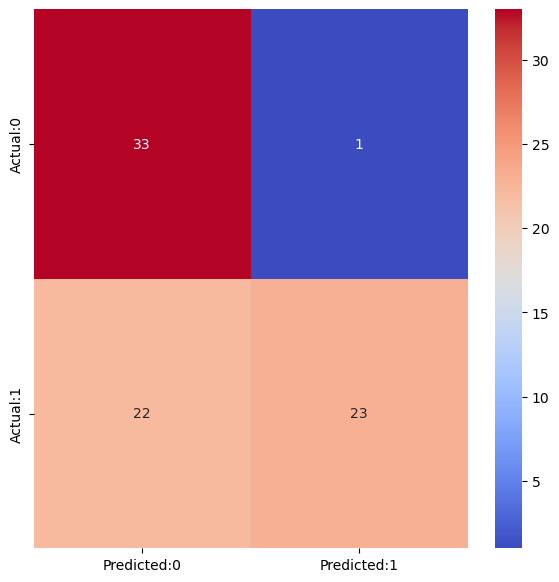

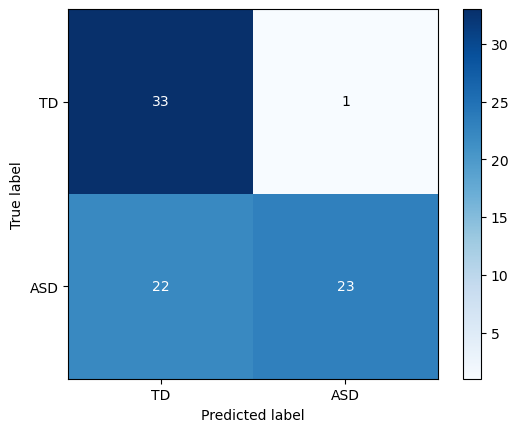

              precision    recall  f1-score   support

           0       0.60      0.97      0.74        34
           1       0.96      0.51      0.67        45

    accuracy                           0.71        79
   macro avg       0.78      0.74      0.70        79
weighted avg       0.80      0.71      0.70        79



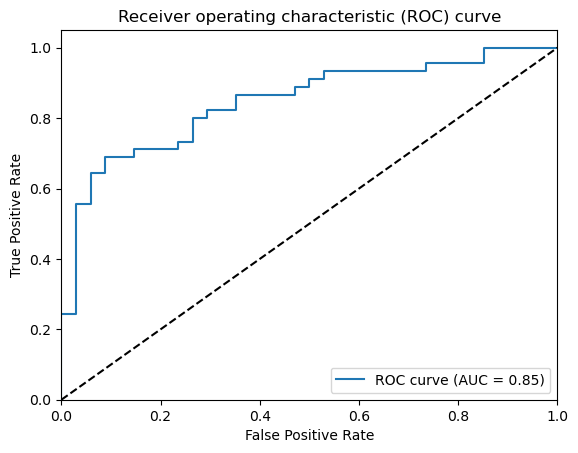

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve

# Load the data from the Excel files
asd_df = pd.read_excel('ASD parameters.xlsx')
td_df = pd.read_excel('TD parameters.xlsx')

# Select the four relevant features and combine the ASD and TD data
features = ["Transition rate from saccade to fixation", "Transition rate from fixation to saccade", "Fixation velocities mean", "Fixation velocities standard deviation"]
asd_data = asd_df[features]
td_data = td_df[features]
X = pd.concat([asd_data, td_data], axis=0)

# Create the target variable (ASD = 1, TD = 0)
y = [1]*asd_data.shape[0] + [0]*td_data.shape[0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the logistic regression model and fit it to the training data
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data and evaluate the model
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,7))
cm=confusion_matrix(y_test, y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="coolwarm")
specificity= cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ', specificity)

sensitivity= cm[1,1]/(cm[1,0]+cm[1,1])
print('Sensitivity : ', sensitivity)

# Visualize the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=[0,1], yticks=[0,1], xlabel='Predicted label', ylabel='True label')
ax.set_xticklabels(['TD', 'ASD'])
ax.set_yticklabels(['TD', 'ASD'])
for i in range(2):
    for j in range(2):
        ax.text(j, i, format(cm[i, j], 'd'), ha='center', va='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')
plt.show()

# Print the classification report
print(classification_report(y_test, y_pred))

# Calculate and plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()




Fitting 5 folds for each of 28 candidates, totalling 140 fits


/Users/maryamlotfigolian/opt/anaconda3/envs/Thesis/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/maryamlotfigolian/opt/anaconda3/envs/Thesis/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/maryamlotfigolian/opt/anaconda3/envs/Thesis/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/maryamlotfigolian/opt/anaconda3/envs/Thesis/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be r

Hyperparameters : {'C': 1.0, 'penalty': 'none'}
Specificity :  0.9705882352941176
Sensitivity :  0.5777777777777777


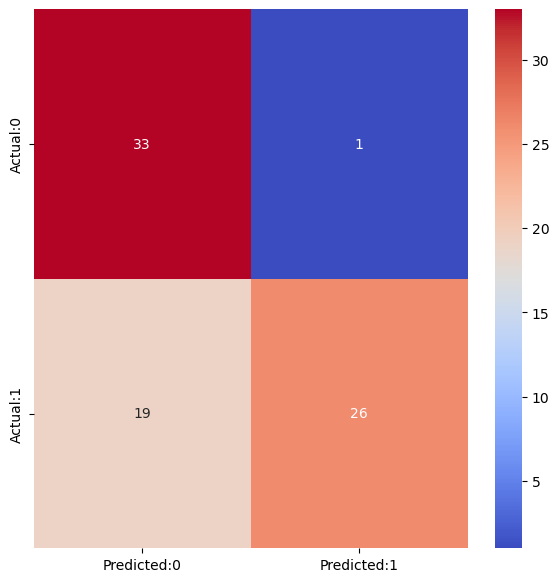

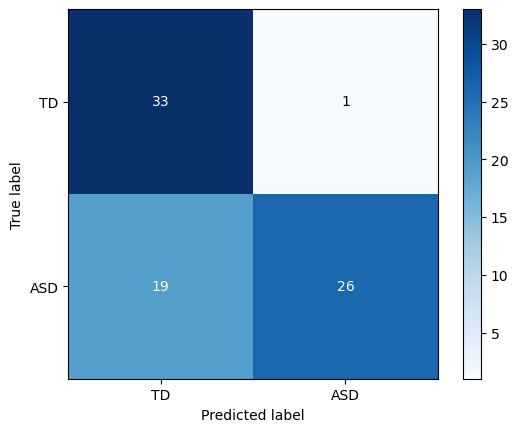

              precision    recall  f1-score   support

           0       0.63      0.97      0.77        34
           1       0.96      0.58      0.72        45

    accuracy                           0.75        79
   macro avg       0.80      0.77      0.74        79
weighted avg       0.82      0.75      0.74        79



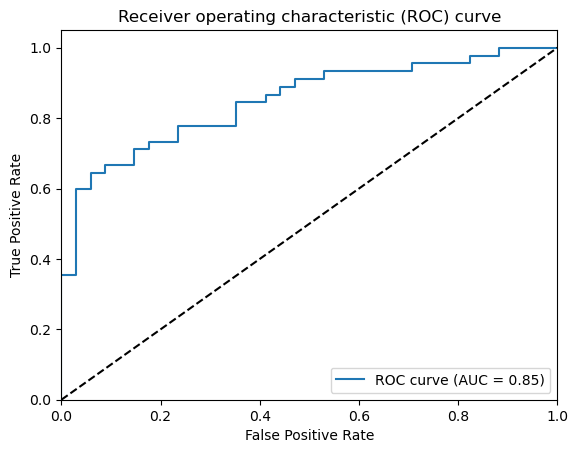

In [9]:
from sklearn.model_selection import GridSearchCV

parameters = {'penalty': ('l1', 'l2','elasticnet', 'none'),
    'C': (1.0, 0.75, 0.5, 0.25, 0.1, 1.25, 1.5)}

logreg= LogisticRegression()
logreg_optimized = GridSearchCV(logreg, param_grid=parameters, n_jobs=-1, verbose=True, cv=5, scoring = 'recall')
logreg_optimized.fit(X_train, y_train)
print("Hyperparameters :", logreg_optimized.best_params_)
# Make predictions on the testing data and evaluate the model
y_pred = logreg_optimized .predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,7))
cm=confusion_matrix(y_test, y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="coolwarm")
specificity= cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ', specificity)

sensitivity= cm[1,1]/(cm[1,0]+cm[1,1])
print('Sensitivity : ', sensitivity)

# Visualize the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=[0,1], yticks=[0,1], xlabel='Predicted label', ylabel='True label')
ax.set_xticklabels(['TD', 'ASD'])
ax.set_yticklabels(['TD', 'ASD'])
for i in range(2):
    for j in range(2):
        ax.text(j, i, format(cm[i, j], 'd'), ha='center', va='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')
plt.show()

# Print the classification report
print(classification_report(y_test, y_pred))

# Calculate and plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, logreg_optimized .predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, logreg_optimized.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()